# Logistic Regression (Binary Classification)

Can we use Linear Regression for Binary Classification?

1. The issue is when we have an outlier in the data our regression line can drastically change that can result into wrong predictions for binary classification problem.

2. The output may be greater than 1 or less than 0 for a binary classifcation problem with output (0 and 1).


# How Logistic Regression Solves Classification Problem

Sigmoid Activation

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

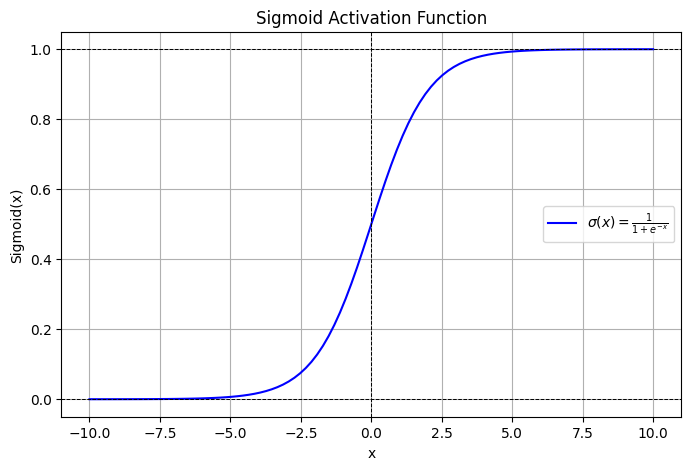

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate input values
x = np.linspace(-10, 10, 100)

# Compute sigmoid values
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)
plt.axhline(y=1, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Sigmoid Activation Function")
plt.legend()
plt.grid()
plt.show()


# Performance Metrics for Classification

Confusion matrix

TP -> When actual 1, predicted 1 <br>
FP -> When actual 0, predicted 1 <br>
FN -> When actual 1, predicted 0 <br>
TN -> When actual 0, predicted 0 <br>

### Evaluation Metrics

#### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$


where:
- \( TP \) = True Positives  
- \( TN \) = True Negatives  
- \( FP \) = False Positives  
- \( FN \) = False Negatives  


When I have 1000 data points, with 900 data points as 1 and 100 data points as 0.


#### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Of all the instances that were predicted as positive, how many were actually positive?

#### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Of all the actual positive instances, how many were correctly predicted?


Spam Classification. Mail -> Not Spam , predicted -> spam (blunder)

We should try to reduce false positive so use precision.


To predict whether person diabetes or not.

Actual -> Person has diabetes, Predicted -> Person has no diabetes

so we should reduce false negative so use recall.


Tomorrow the stock market will crash or not.

False Positive -> Market not crash -> Market will crash


### F-Beta Score

The **F-Beta Score** is a weighted harmonic mean of Precision and Recall, where \(\beta\) controls the balance between them.

$$
F_{\beta} = (1 + \beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}
$$

where:
- **Precision** = $( \frac{TP}{TP + FP} )$
- **Recall** = $( \frac{TP}{TP + FN} )$
- (β) is a parameter that determines the weight of recall in the score.
  - If \( β > 1 \), recall is given more importance.
  - If \( β< 1 \), precision is given more importance.
  - If \( β= 1 ), the formula simplifies to the **F1-score**.



# Logistic Regression Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
#create the dataset
X, y = make_classification(n_samples = 1000, n_features = 10, n_classes=2, random_state = 42, )

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [ ]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#model training
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predictions for test data
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
log_reg.predict_proba(X_test)

array([[7.74477909e-01, 2.25522091e-01],
       [3.36684957e-02, 9.66331504e-01],
       [6.70682154e-01, 3.29317846e-01],
       [7.98668032e-02, 9.20133197e-01],
       [9.76616650e-01, 2.33833501e-02],
       [4.13572804e-02, 9.58642720e-01],
       [9.79028767e-01, 2.09712329e-02],
       [9.59367261e-01, 4.06327393e-02],
       [8.08520049e-01, 1.91479951e-01],
       [6.84954318e-01, 3.15045682e-01],
       [9.13669448e-01, 8.63305524e-02],
       [2.63597018e-01, 7.36402982e-01],
       [5.25844192e-01, 4.74155808e-01],
       [2.11912354e-01, 7.88087646e-01],
       [7.93592056e-01, 2.06407944e-01],
       [9.46621678e-01, 5.33783219e-02],
       [2.62957933e-02, 9.73704207e-01],
       [3.24212617e-01, 6.75787383e-01],
       [3.14803584e-01, 6.85196416e-01],
       [2.04956217e-01, 7.95043783e-01],
       [5.04587065e-01, 4.95412935e-01],
       [9.66703630e-01, 3.32963696e-02],
       [2.00514796e-01, 7.99485204e-01],
       [7.77891908e-01, 2.22108092e-01],
       [8.729863

In [ ]:
#performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

Accuracy: 0.847


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[118,  17],
       [ 29, 136]])

In [ ]:
#classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Hyperparameter Tuning and Cross Validation

In [ ]:
model = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1.0, 0.1, .01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
parms = {"penalty":penalty, "C":c_values, "solver":solver}
parms

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=parms, scoring = "accuracy", cv =cv, n_jobs = -1)

In [ ]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
grid.best_score_

0.8785714285714287

In [ ]:
grid_pred = grid.predict(X_test)
#performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, grid_pred)
print("Accuracy:", round(accuracy, 3))

Accuracy: 0.853


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, grid_pred)
cm

array([[124,  11],
       [ 33, 132]])

In [ ]:
#classification report
report = classification_report(y_test, grid_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



# Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()
rand_cv = RandomizedSearchCV(estimator = model, param_distributions=parms, cv = 5, scoring = "accuracy")

In [ ]:
rand_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
rand_cv.best_score_

0.8785714285714287

In [ ]:
rand_cv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}

In [ ]:
rand_pred = rand_cv.predict(X_test)
accuracy = accuracy_score(y_test, rand_pred)
print("Accuracy:", round(accuracy, 3))

Accuracy: 0.853


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, rand_pred)
cm

array([[124,  11],
       [ 33, 132]])

In [ ]:
#classification report
report = classification_report(y_test, rand_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



# Logistic Regression for Multi Classification Problem

In [ ]:
#create the dataset
X, y = make_classification(n_samples = 1000, n_features = 10, n_informative = 3,  n_classes=3, random_state = 42, )

In [ ]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       103
           1       0.58      0.40      0.47        96
           2       0.71      0.86      0.78       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.68      0.66       300



# Logistic Regression for Imbalaned Dataset

In [ ]:
from collections import Counter
X, y = make_classification(n_samples = 10000, n_features = 2, n_clusters_per_class=1, n_redundant = 0, weights = [0.99], random_state = 10)

In [ ]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

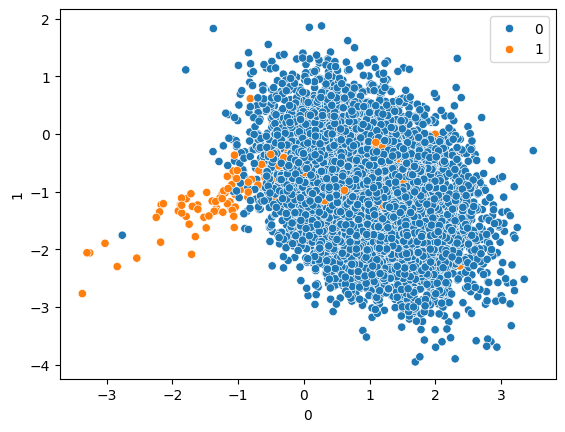

In [ ]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
model = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1.0, 0.1, .01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 10] for y in [1, 10, 50, 100]]
parms = {"penalty":penalty, "C":c_values, "solver":solver, "class_weight":class_weight}
parms

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100}]}

In [ ]:
# GridSearchCV
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=parms, scoring = "accuracy", cv =cv, n_jobs = -1)

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
#classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2953
           1       0.81      0.36      0.50        47

    accuracy                           0.99      3000
   macro avg       0.90      0.68      0.75      3000
weighted avg       0.99      0.99      0.99      3000



# Logistic Regression ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
X, y = make_classification(n_samples = 1000, n_classes=2, random_state = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
dummy_model_prob = [0 for _ in range(len(y_test))]
print(dummy_model_prob)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#fitting model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#predicting probabilities
model_prob = model.predict_proba(X_test)

In [ ]:
#focus on positive outcome
model_prob = model_prob[:, 1]

In [ ]:
# Lets calaculate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9044392939917989


In [ ]:
#calculate ROC Curve
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

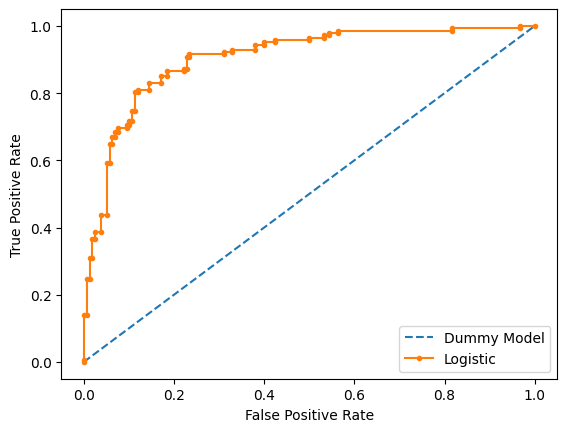

In [ ]:
#plot the curve
plt.plot(dummy_fpr, dummy_tpr, linestyle = "--", label = "Dummy Model")
plt.plot(model_fpr, model_tpr, marker = ".", label = "Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
thresholds

array([           inf, 9.99841431e-01, 9.90312178e-01, 9.89789604e-01,
       9.69840515e-01, 9.67711850e-01, 9.54350198e-01, 9.49376937e-01,
       9.37595993e-01, 9.36574071e-01, 9.30988369e-01, 9.26229039e-01,
       9.09517229e-01, 9.07343469e-01, 8.43163099e-01, 8.42880786e-01,
       8.23496913e-01, 8.19906654e-01, 8.05679913e-01, 8.03023949e-01,
       7.88766865e-01, 7.83267314e-01, 7.79808524e-01, 7.73542569e-01,
       7.73042351e-01, 7.66533994e-01, 7.59977292e-01, 7.55728997e-01,
       7.38345078e-01, 7.33647339e-01, 6.87282357e-01, 6.53656208e-01,
       6.50234894e-01, 6.25724165e-01, 6.10931389e-01, 5.68941486e-01,
       5.22332907e-01, 5.07118055e-01, 4.88670078e-01, 4.61009759e-01,
       4.59292509e-01, 4.56246075e-01, 4.31124193e-01, 4.28500867e-01,
       4.10339171e-01, 3.16619731e-01, 3.09453767e-01, 3.01031985e-01,
       2.78367698e-01, 1.82394320e-01, 1.77011298e-01, 1.66057291e-01,
       1.49173917e-01, 1.31183339e-01, 1.28392734e-01, 9.46586259e-02,
      

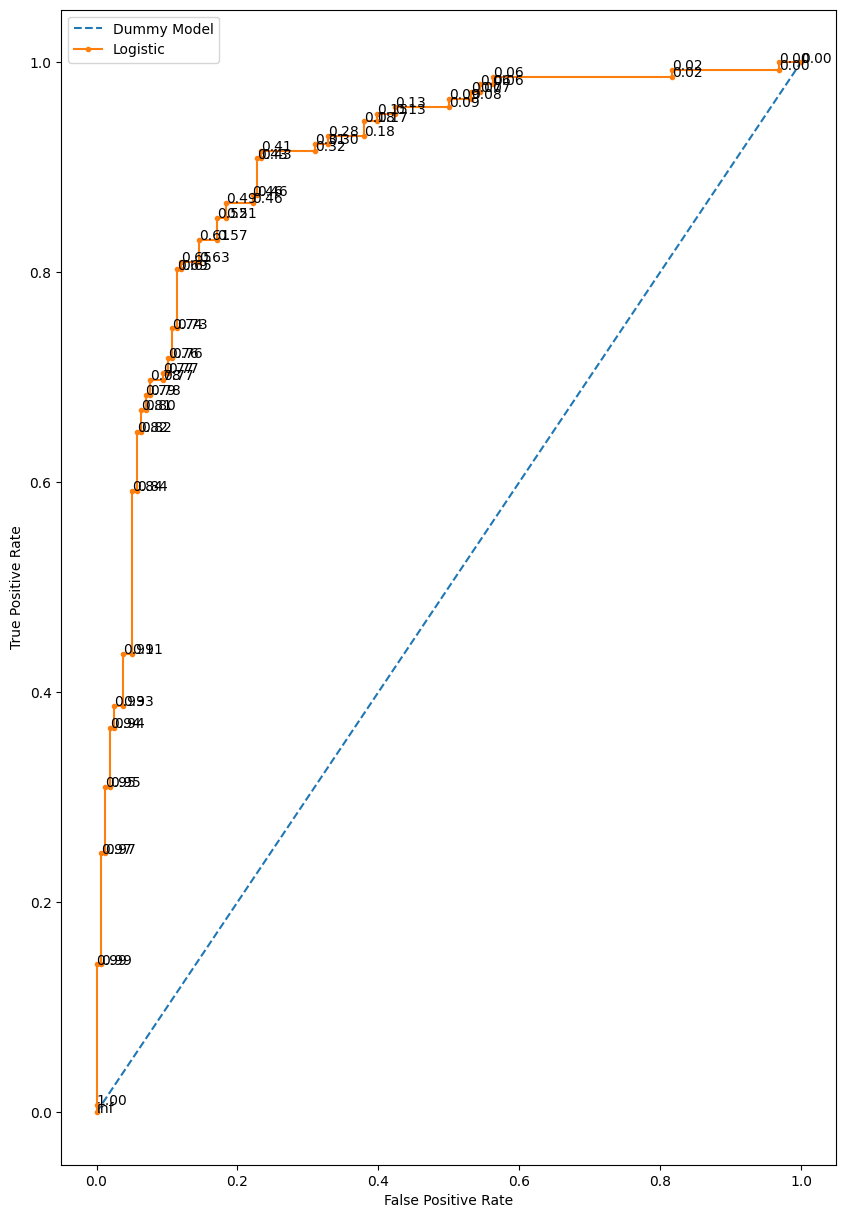

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axis before plotting
fig, ax = plt.subplots(figsize=(10, 15))  # Adjusted figsize

# Plot the ROC curve
ax.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model")
ax.plot(model_fpr, model_tpr, marker=".", label="Logistic")

# Annotate threshold values at corresponding points
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{thresh:.2f}', xy=(fpr, tpr), fontsize=10)

# Labels and legend
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()

# Show plot
plt.show()
